# Python-igraph编程实践基础教程：igraph官方手册使用解读

## igraph编程实践基础教程第04课：计算网络的基本拓扑指标

In [1]:
# !/usr/bin/python3
# -*- coding: utf-8 -*-
# Author ： 单哥的科研日常（公众号、B站）

In [2]:
import igraph as ig
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
print(ig.__version__)
print(matplotlib.__version__)
print(nx.__version__)

0.10.4
3.5.3
2.8.8


In [3]:
g = ig.Graph.Famous('Zachary')

In [4]:
# 获取节点和连边数量
n = g.vcount()
m = g.ecount()
print(n, m)

34 78


In [5]:
# 接下来以一个小规模图来计算其他特征
g = ig.Graph([(0,1), (0,2), (2,3), (3,4), (4,2), (2,5), (5,0), (6,3), (5,6)])

In [6]:
# 获取所有节点的度
g.degree()

[3, 1, 4, 3, 2, 3, 2]

In [30]:
# 度分布直方图
print(g.degree_distribution())

N = 7, mean +- sd: 2.5714 +- 0.9759
[1, 2): * (1)
[2, 3): ** (2)
[3, 4): *** (3)
[4, 5): * (1)


In [8]:
# 获取邻接矩阵
g.get_adjacency()

Matrix([[0, 1, 1, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0, 0], [1, 0, 0, 1, 1, 1, 0], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 1, 0, 0, 0], [1, 0, 1, 0, 0, 0, 1], [0, 0, 0, 1, 0, 1, 0]])

In [9]:
# 关联系数
g.assortativity_degree()

-0.18867924528301963

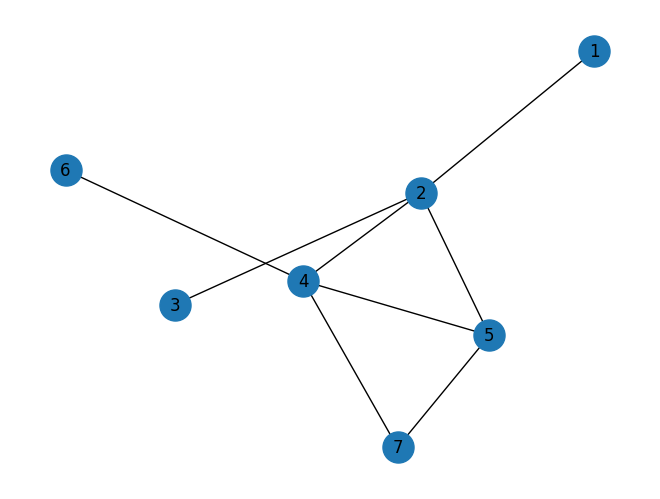

In [10]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7])
G.add_edges_from([(1,2),(2,3),(2,4),(2,5),(4,5),(4,6),(4,7),(5,7)])
nx.draw(G, node_size=500, with_labels=True)

### networkx下的局部集聚系数与全局集聚系数

In [11]:
# 平均集聚系数
print(nx.average_clustering(G))

0.3095238095238095


In [12]:
# 全局集聚系数
print(nx.transitivity(G))

0.375


### igraph下的局部集聚系数与全局集聚系数

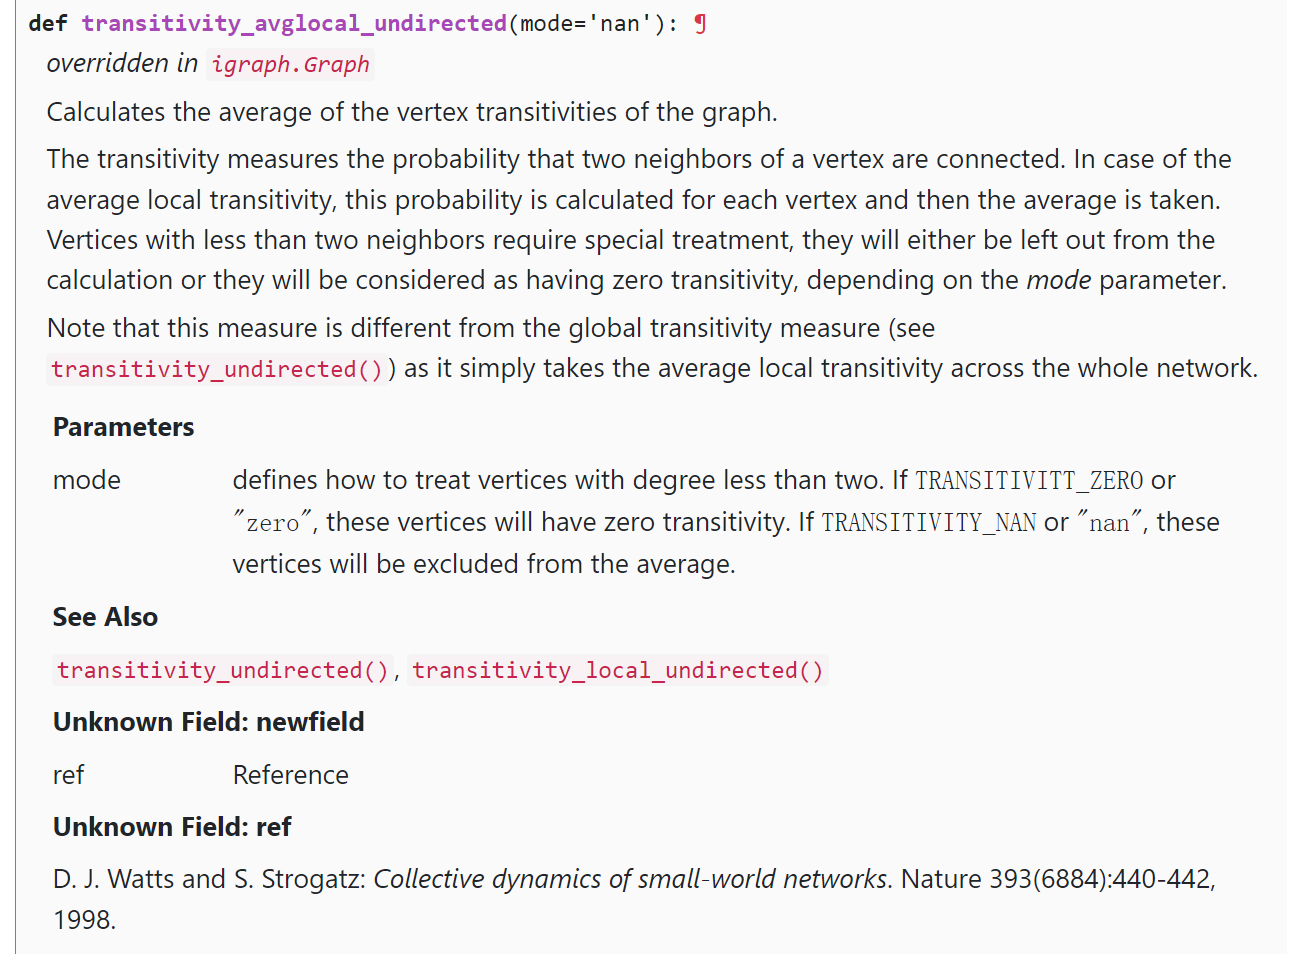

In [13]:
from IPython.display import Image
Image(filename = './attached files/平均局部集聚系数.png', width=600, height=400)

In [14]:
newg = ig.Graph.from_networkx(G)
# igraph下的平均局部集聚系数
newg.transitivity_avglocal_undirected(mode='zero')

0.3095238095238095

In [15]:
# 计算每个节点的局部集聚系数
newg.transitivity_local_undirected(mode='zero')

[0.0,
 0.16666666666666666,
 0.0,
 0.3333333333333333,
 0.6666666666666666,
 0.0,
 1.0]

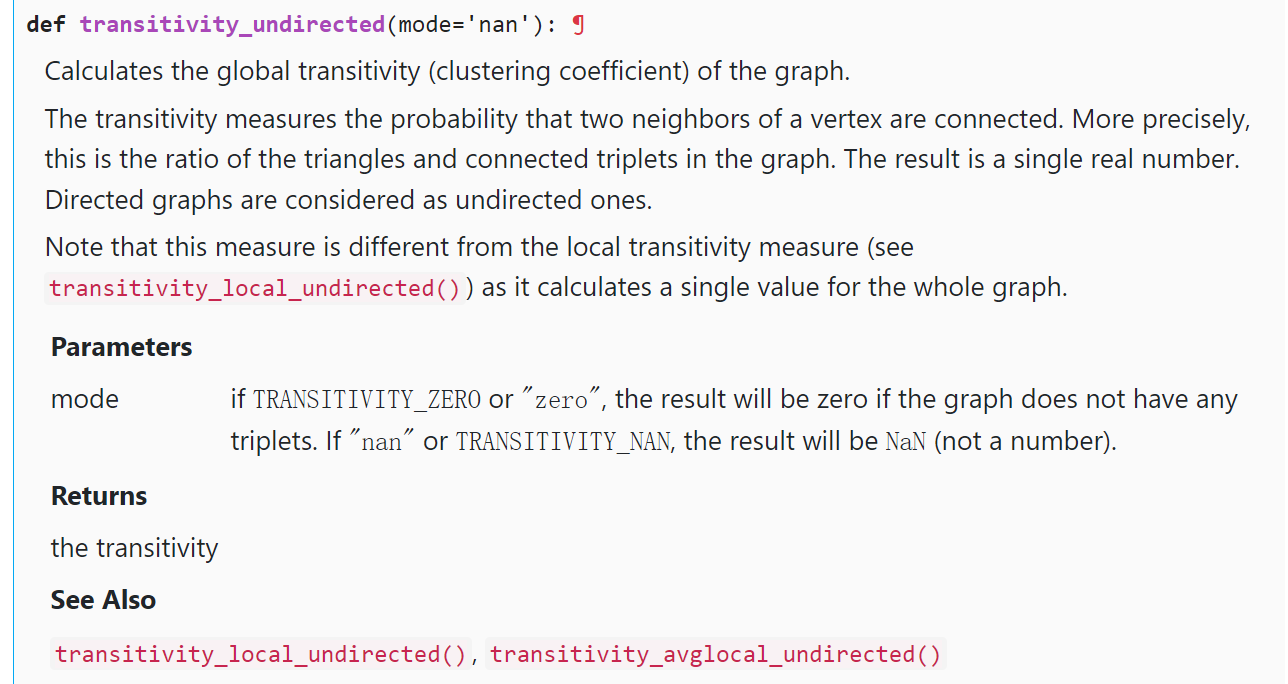

In [16]:
Image(filename = './attached files/全局集聚系数.png', width=600, height=400)

In [17]:
# igraph下的全局集聚系数
newg.transitivity_undirected()

0.375

In [18]:
# 计算节点介数中心性
print(g.betweenness())
# 遍历
for i, bet in enumerate(g.betweenness()):
    print(i, bet)

[5.0, 0.0, 5.5, 1.5, 0.0, 2.5, 0.5]
0 5.0
1 0.0
2 5.5
3 1.5
4 0.0
5 2.5
6 0.5


In [19]:
# 计算边介数中心性
g.edge_betweenness()

[6.0, 6.0, 4.0, 2.0, 4.0, 3.0, 4.0, 3.0, 4.0]

In [20]:
# 接近度中心性
g.closeness()

[0.6666666666666666,
 0.42857142857142855,
 0.75,
 0.6,
 0.5454545454545454,
 0.6666666666666666,
 0.5454545454545454]

In [21]:
# 特征向量中心性
g.eigenvector_centrality()

[0.7111995450107998,
 0.24860112203602602,
 1.0,
 0.7513988779639741,
 0.6122047310756774,
 0.7860026990612518,
 0.537401577025226]

In [22]:
# pagerank中心性
g.pagerank()

[0.1715187083669299,
 0.07002553879920158,
 0.20933537164407268,
 0.16151684644322287,
 0.11167544439518333,
 0.16265174994590004,
 0.11327634040548959]

In [23]:
# 计算直径
g.diameter() 

3

In [24]:
# 平均最短路径长度
g.average_path_length()

1.7142857142857142

In [26]:
# 计算最短距离矩阵
g.distances()

[[0, 1, 1, 2, 2, 1, 2],
 [1, 0, 2, 3, 3, 2, 3],
 [1, 2, 0, 1, 1, 1, 2],
 [2, 3, 1, 0, 1, 2, 1],
 [2, 3, 1, 1, 0, 2, 2],
 [1, 2, 1, 2, 2, 0, 1],
 [2, 3, 2, 1, 2, 1, 0]]

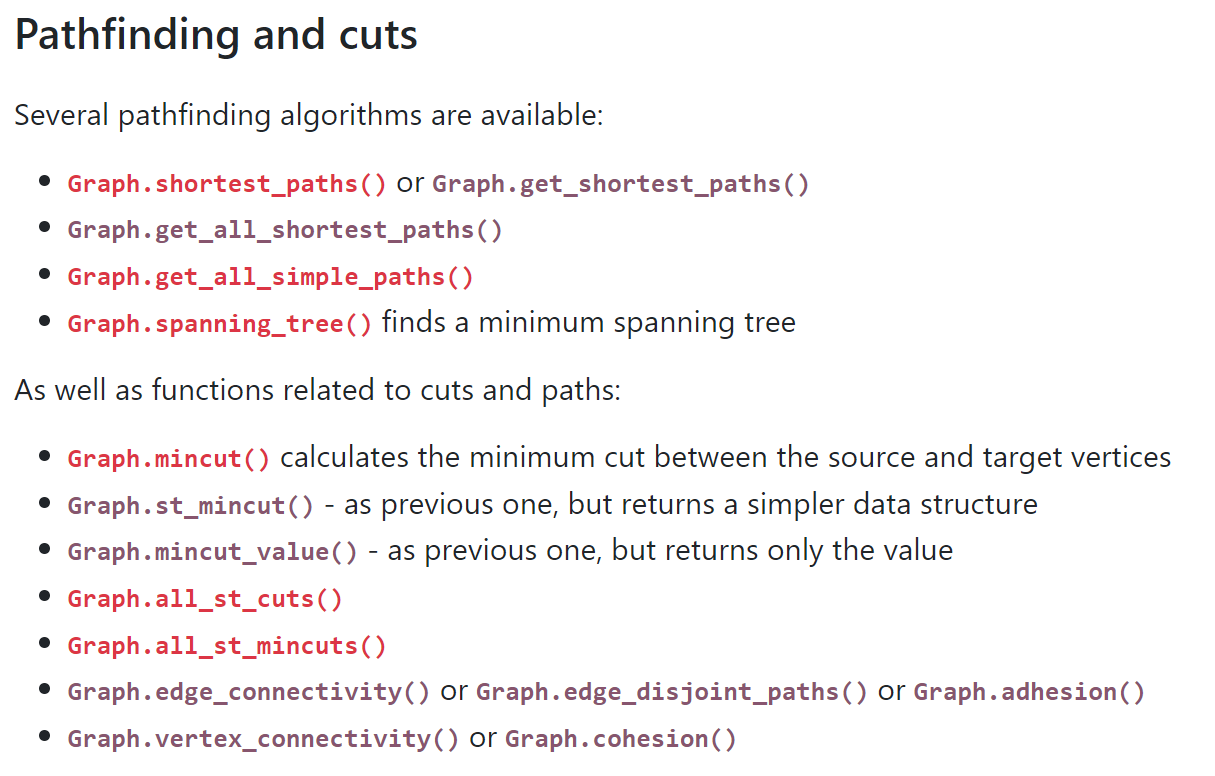

In [27]:
# 关于路径和距离的更多功能见下图
from IPython.display import Image
Image(filename = './attached files/pathfinding_and_cuts.png', width=600, height=400)

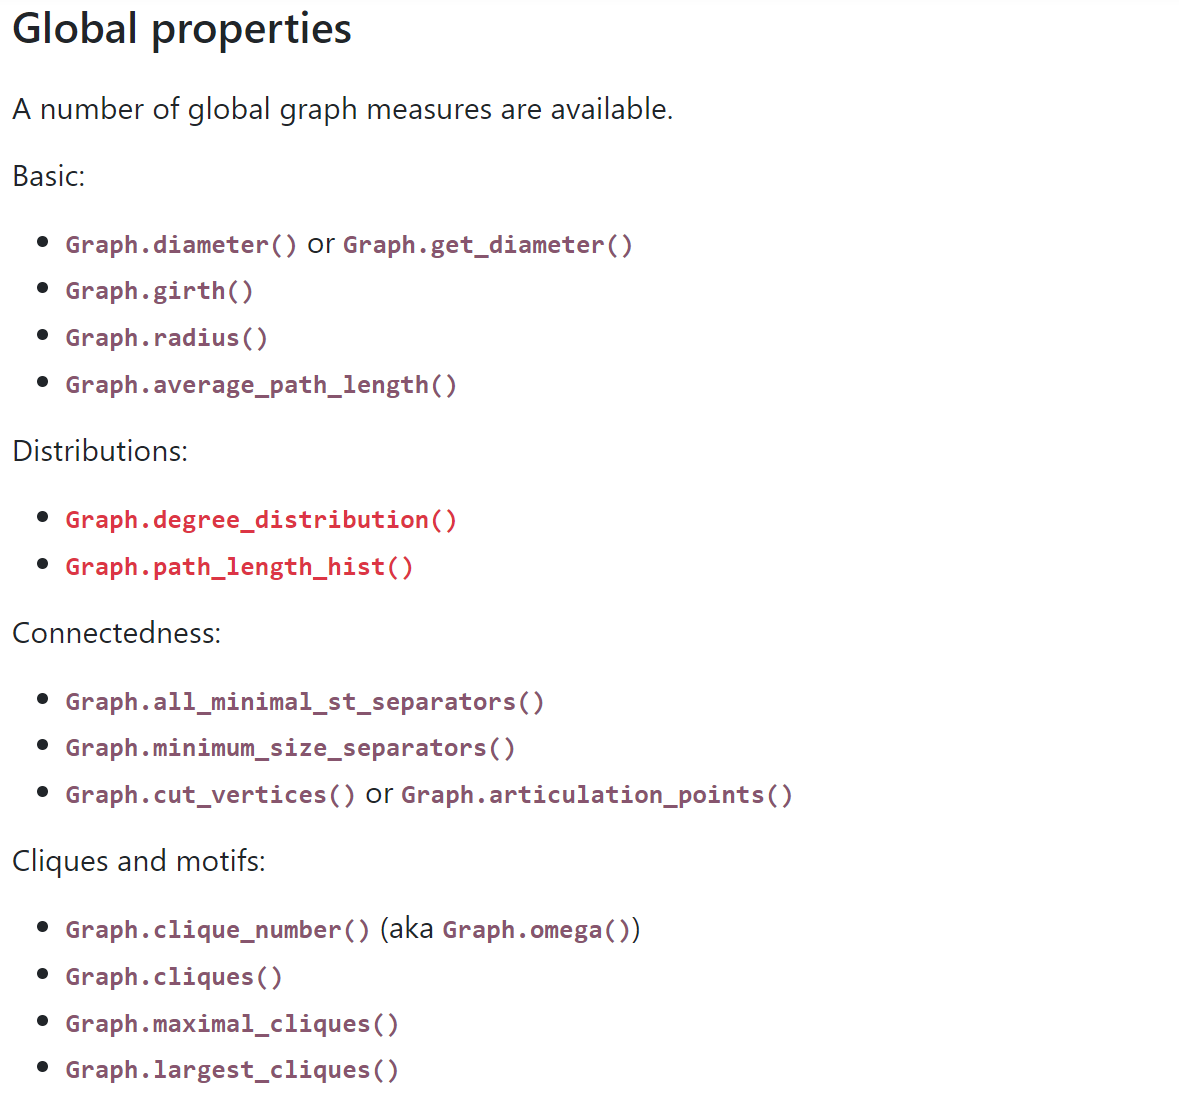

In [28]:
# 其他的一些全局特征的计算
Image(filename = './attached files/global properties.png', width=600, height=400)

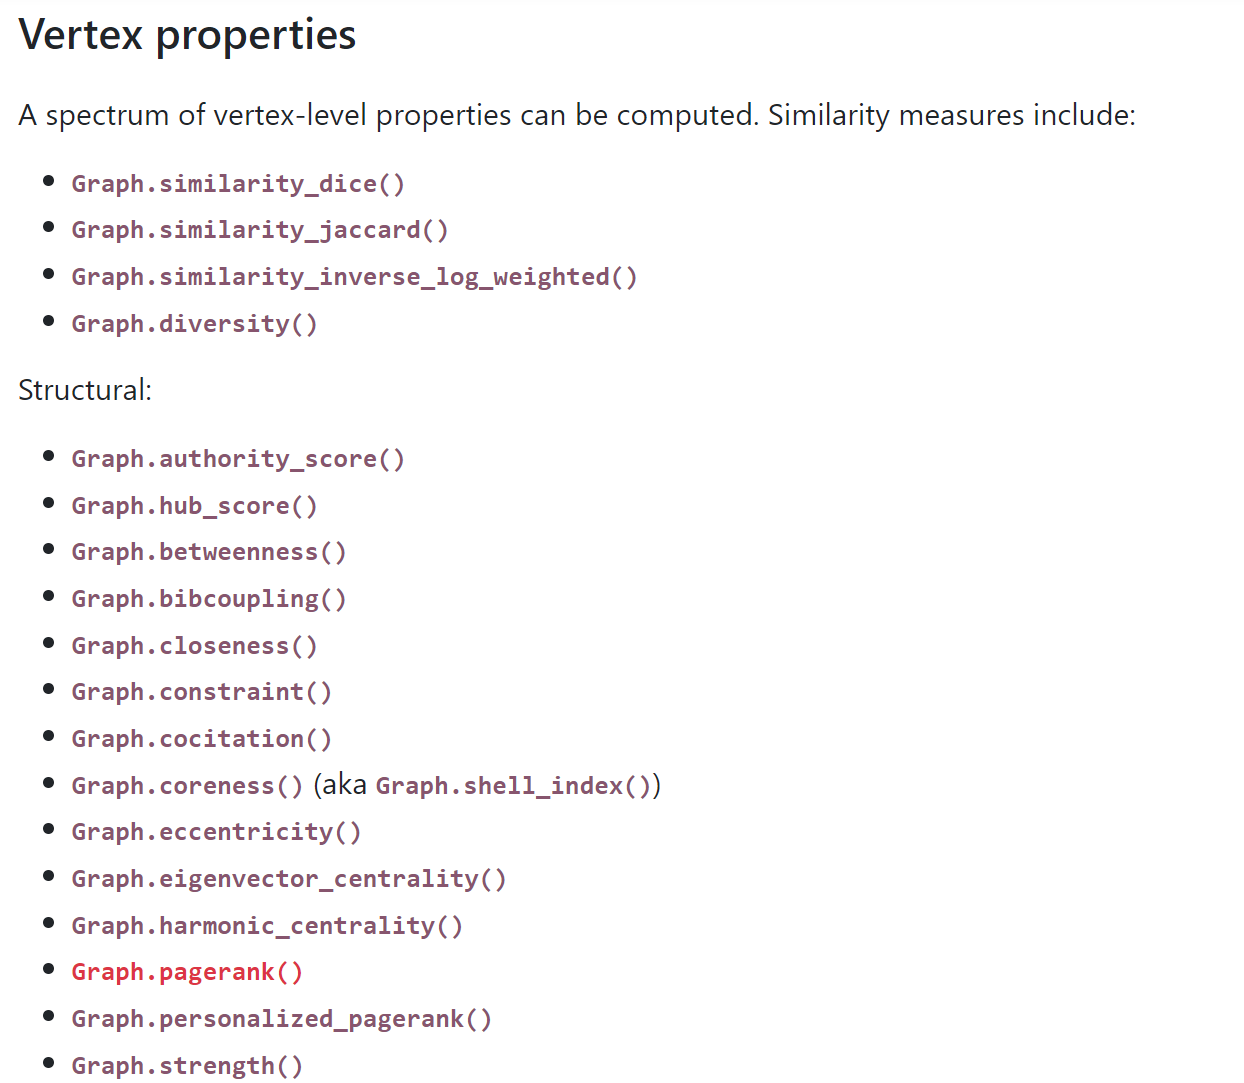

In [29]:
# 其他节点特征的计算
Image(filename = './attached files/vertex_properties.png', width=600, height=400)

#### 网络的指标请参考官方网址：https://igraph.org/python/versions/latest/analysis.html